# IMPORT DATA

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Skripsi/Amikom.csv'
df = pd.read_csv(file_path)

# **EDA**

In [ ]:
print("Data awal")
display(df.head())

Data awal


,THA,Prodi,Hashed NPM,Ipk,SksTotal,IPS1,IPS2,IPS3,IPS4,IPS5,IPS6,IPS7,JenisKelamin,UsiaMasuk,PredikatKelulusan,Rerata Kehadiran
0,2018,S1-Informatika,1836506135,3.72,144,3.75,3.50,3.42,3.75,3.92,4.00,0.0,L,20,Cum Laude,16
1,2018,S1-Informatika,1836506132,3.49,144,3.42,3.25,3.50,3.75,3.33,2.67,0.0,L,19,Sangat Memuaskan,16
2,2018,S1-Informatika,1836506133,3.97,144,3.92,4.00,3.92,4.00,4.00,3.00,4.0,L,19,Cum Laude,17
3,2018,S1-Informatika,1836506131,3.57,144,3.25,3.42,3.42,3.83,3.50,3.50,0.0,L,19,Sangat Memuaskan,16
4,2018,S1-Informatika,1836506122,3.82,144,3.83,3.83,4.00,3.67,3.92,3.56,0.0,P,22,Cum Laude,16


In [ ]:
df

,THA,Prodi,Hashed NPM,Ipk,SksTotal,IPS1,IPS2,IPS3,IPS4,IPS5,IPS6,IPS7,JenisKelamin,UsiaMasuk,PredikatKelulusan,Rerata Kehadiran
0,2018,S1-Informatika,1836506135,3.72,144,3.75,3.50,3.42,3.75,3.92,4.00,0.00,L,20,Cum Laude,16
1,2018,S1-Informatika,1836506132,3.49,144,3.42,3.25,3.50,3.75,3.33,2.67,0.00,L,19,Sangat Memuaskan,16
2,2018,S1-Informatika,1836506133,3.97,144,3.92,4.00,3.92,4.00,4.00,3.00,4.00,L,19,Cum Laude,17
3,2018,S1-Informatika,1836506131,3.57,144,3.25,3.42,3.42,3.83,3.50,3.50,0.00,L,19,Sangat Memuaskan,16
4,2018,S1-Informatika,1836506122,3.82,144,3.83,3.83,4.00,3.67,3.92,3.56,0.00,P,22,Cum Laude,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4528,2020,S1-Ilmu Komunikasi,1703339747,3.84,146,4.00,3.82,3.75,3.67,3.92,3.80,1.60,P,18,Cum Laude,13
4529,2020,S1-Ilmu Komunikasi,1703339745,3.56,146,3.36,3.55,3.42,3.17,3.58,3.92,3.75,L,19,Cum Laude,13
4530,2020,S1-Ilmu Komunikasi,1703339758,3.64,146,3.73,3.55,3.50,3.33,3.83,3.80,4.00,P,19,Cum Laude,12
4531,2020,S1-Ilmu Komunikasi,1703339763,3.58,146,3.91,3.45,3.50,3.17,3.75,3.60,1.60,P,20,Cum Laude,13


In [ ]:
print("\nInformasi Data:")
df.info()


Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4533 entries, 0 to 4532
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   THA                4533 non-null   int64  
 1   Prodi              4533 non-null   object 
 2   Hashed NPM         4533 non-null   int64  
 3   Ipk                4533 non-null   float64
 4   SksTotal           4533 non-null   int64  
 5   IPS1               4533 non-null   float64
 6   IPS2               4533 non-null   float64
 7   IPS3               4533 non-null   float64
 8   IPS4               4533 non-null   float64
 9   IPS5               4533 non-null   float64
 10  IPS6               4533 non-null   float64
 11  IPS7               4533 non-null   float64
 12  JenisKelamin       4533 non-null   object 
 13  UsiaMasuk          4533 non-null   int64  
 14  PredikatKelulusan  4533 non-null   object 
 15  Rerata Kehadiran   4533 non-null   int64  
dtypes: floa

In [ ]:
print("\nInformasi Data:")
display(df.describe(include='all'))


Informasi Data:


,THA,Prodi,Hashed NPM,Ipk,SksTotal,IPS1,IPS2,IPS3,IPS4,IPS5,IPS6,IPS7,JenisKelamin,UsiaMasuk,PredikatKelulusan,Rerata Kehadiran
count,4533.000000,4533,4.533000e+03,4533.000000,4533.000000,4533.000000,4533.000000,4533.000000,4533.000000,4533.000000,4533.000000,4533.000000,4533,4533.000000,4533,4533.000000
unique,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,4,NaN
top,NaN,S1-Informatika,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L,NaN,Sangat Memuaskan,NaN
freq,NaN,1189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3299,NaN,2125,NaN
mean,2018.822413,NaN,1.752274e+09,3.522813,144.680124,3.512226,3.454763,3.423446,3.459133,3.444825,3.382941,1.471741,NaN,18.590117,NaN,13.885947
std,0.773577,NaN,7.081891e+07,0.299745,1.859601,0.376609,0.506525,0.551509,0.534763,0.537098,0.611164,1.552881,NaN,0.986497,NaN,2.448590
min,2018.000000,NaN,1.648805e+09,2.140000,144.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,15.000000,NaN,4.000000
25%,2018.000000,NaN,1.699137e+09,3.360000,144.000000,3.330000,3.330000,3.250000,3.330000,3.250000,3.110000,0.000000,NaN,18.000000,NaN,12.000000
50%,2019.000000,NaN,1.703337e+09,3.580000,144.000000,3.580000,3.580000,3.580000,3.580000,3.580000,3.560000,1.200000,NaN,18.000000,NaN,14.000000
75%,2019.000000,NaN,1.836506e+09,3.740000,144.000000,3.750000,3.750000,3.750000,3.750000,3.830000,3.820000,3.000000,NaN,19.000000,NaN,16.000000


In [ ]:
print("\nMissing Values (jumlah):")
print(df.isnull().sum())


Missing Values (jumlah):
THA                  0
Prodi                0
Hashed NPM           0
Ipk                  0
SksTotal             0
IPS1                 0
IPS2                 0
IPS3                 0
IPS4                 0
IPS5                 0
IPS6                 0
IPS7                 0
JenisKelamin         0
UsiaMasuk            0
PredikatKelulusan    0
Rerata Kehadiran     0
dtype: int64


In [ ]:
print("\nJumlah Data Duplikat:")
print(df.duplicated().sum())


Jumlah Data Duplikat:
0


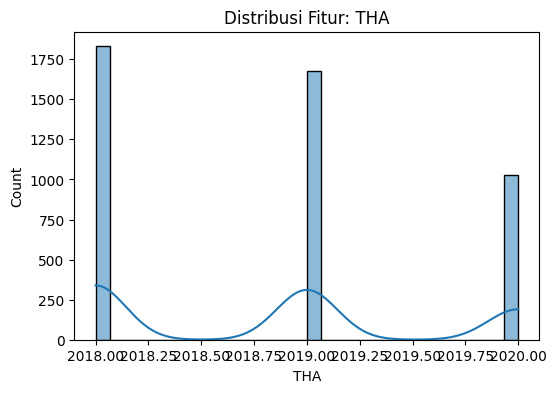

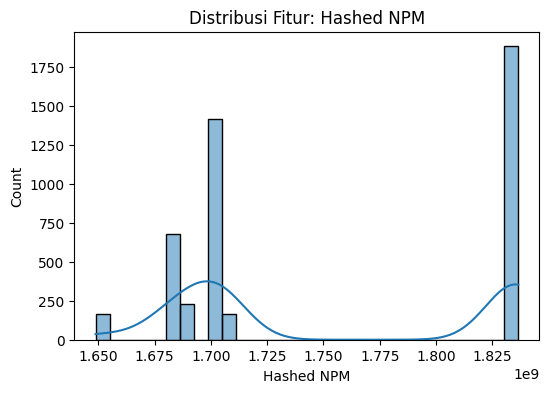

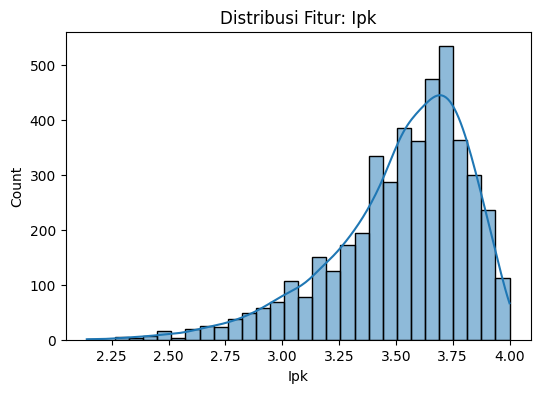

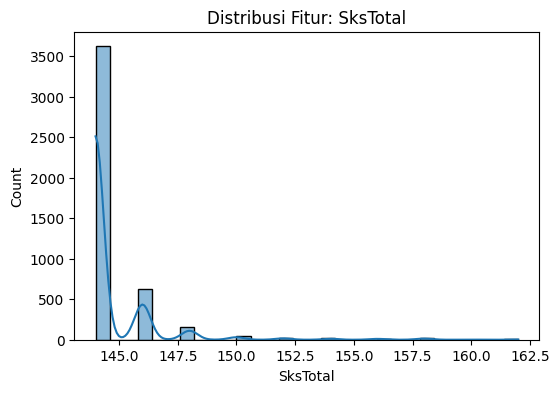

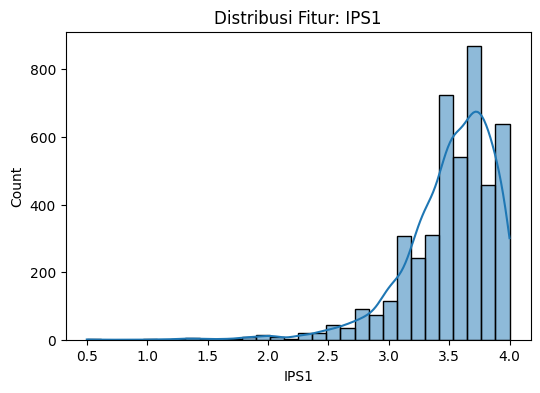

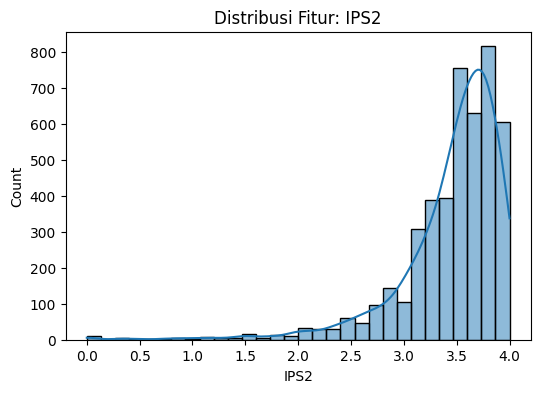

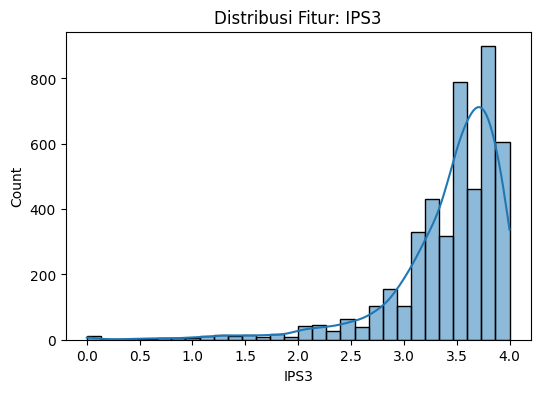

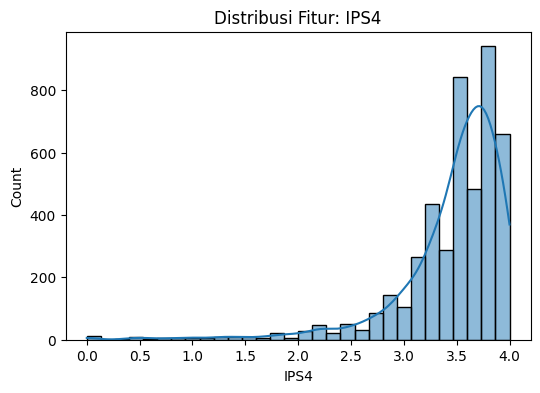

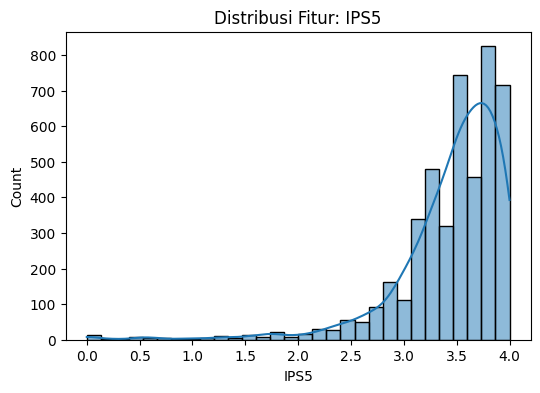

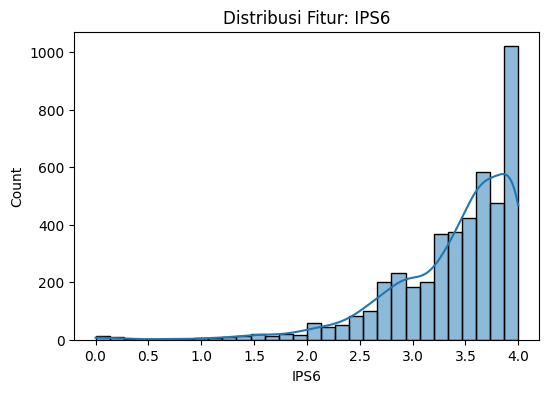

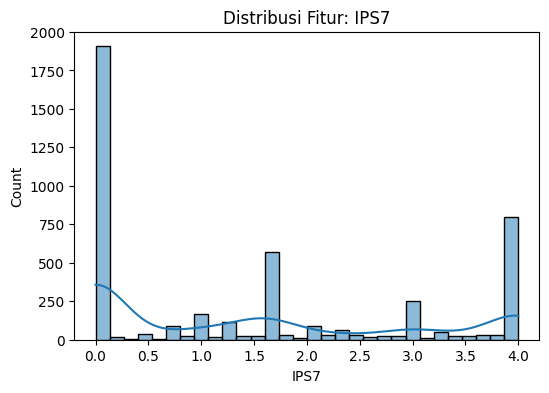

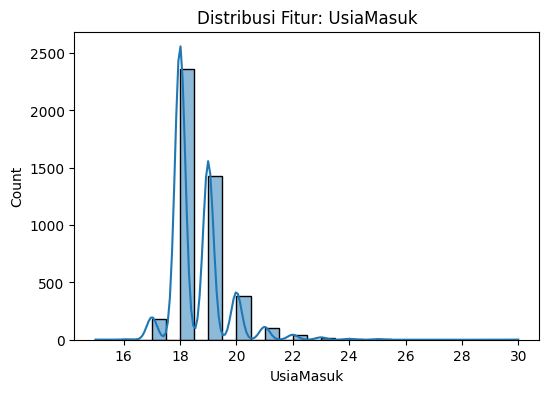

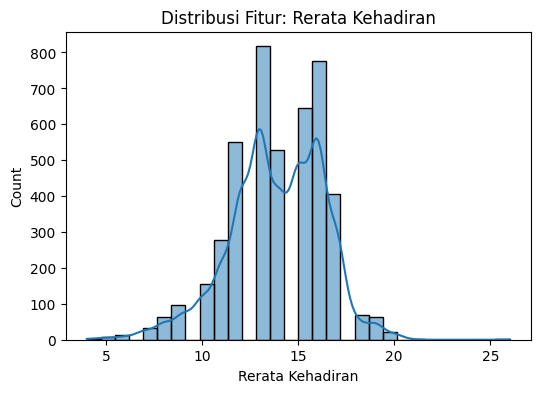

In [ ]:
numerik = df.select_dtypes(include=np.number).columns
for col in numerik:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribusi Fitur: {col}')
    plt.show()

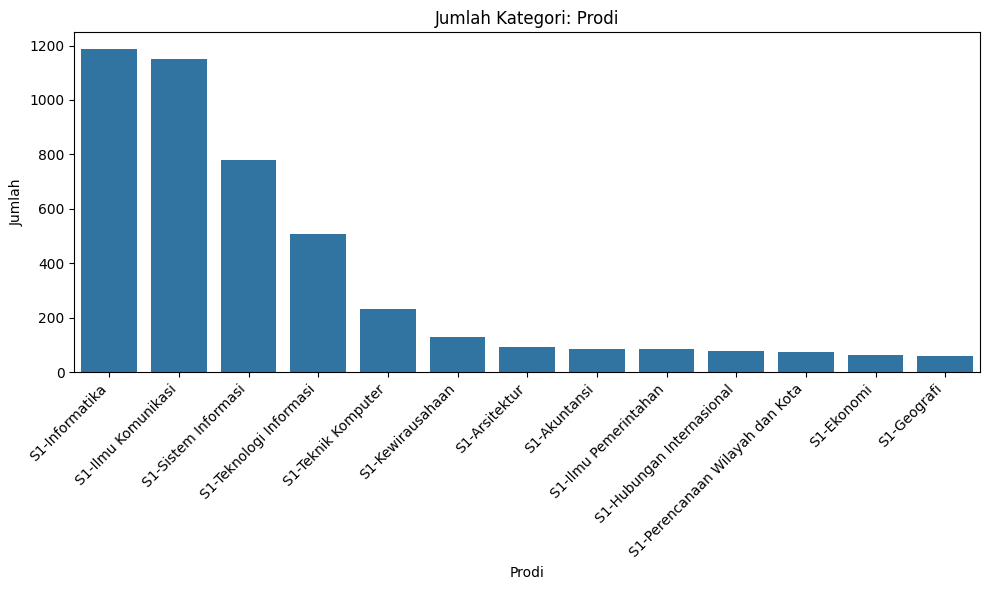

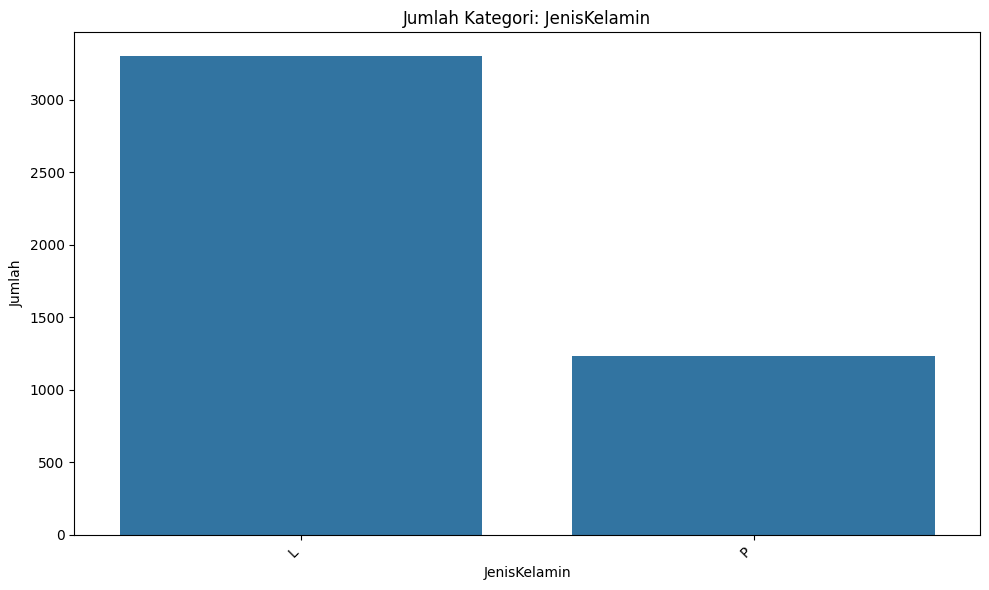

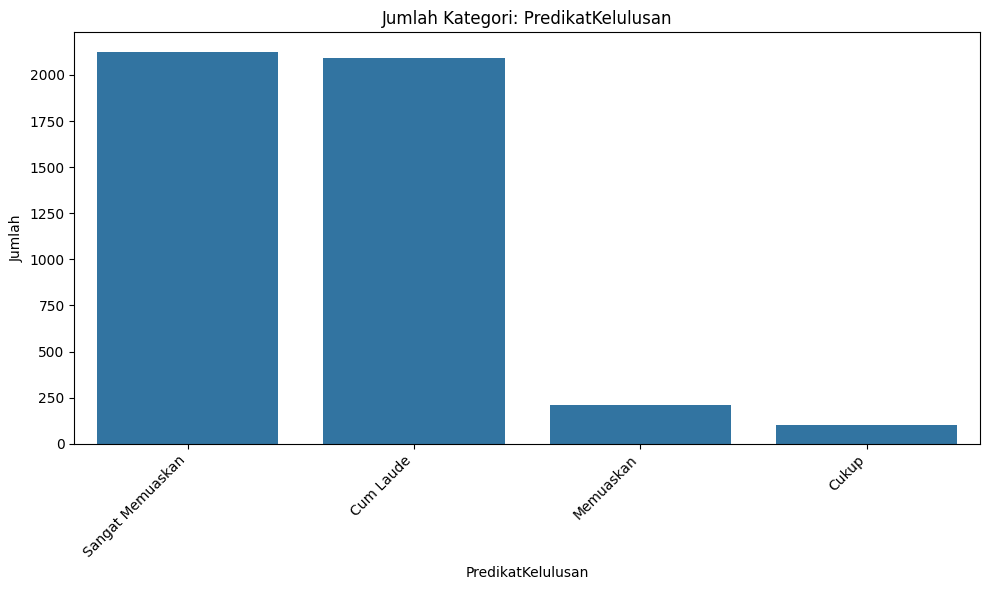

In [ ]:
kategori = df.select_dtypes(include='object').columns

for col in kategori:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Jumlah Kategori: {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')


    plt.xticks(rotation=45, ha='right')


    plt.tight_layout()
    plt.show()

In [ ]:
corr_matrix = df.corr(numeric_only=True)

In [ ]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

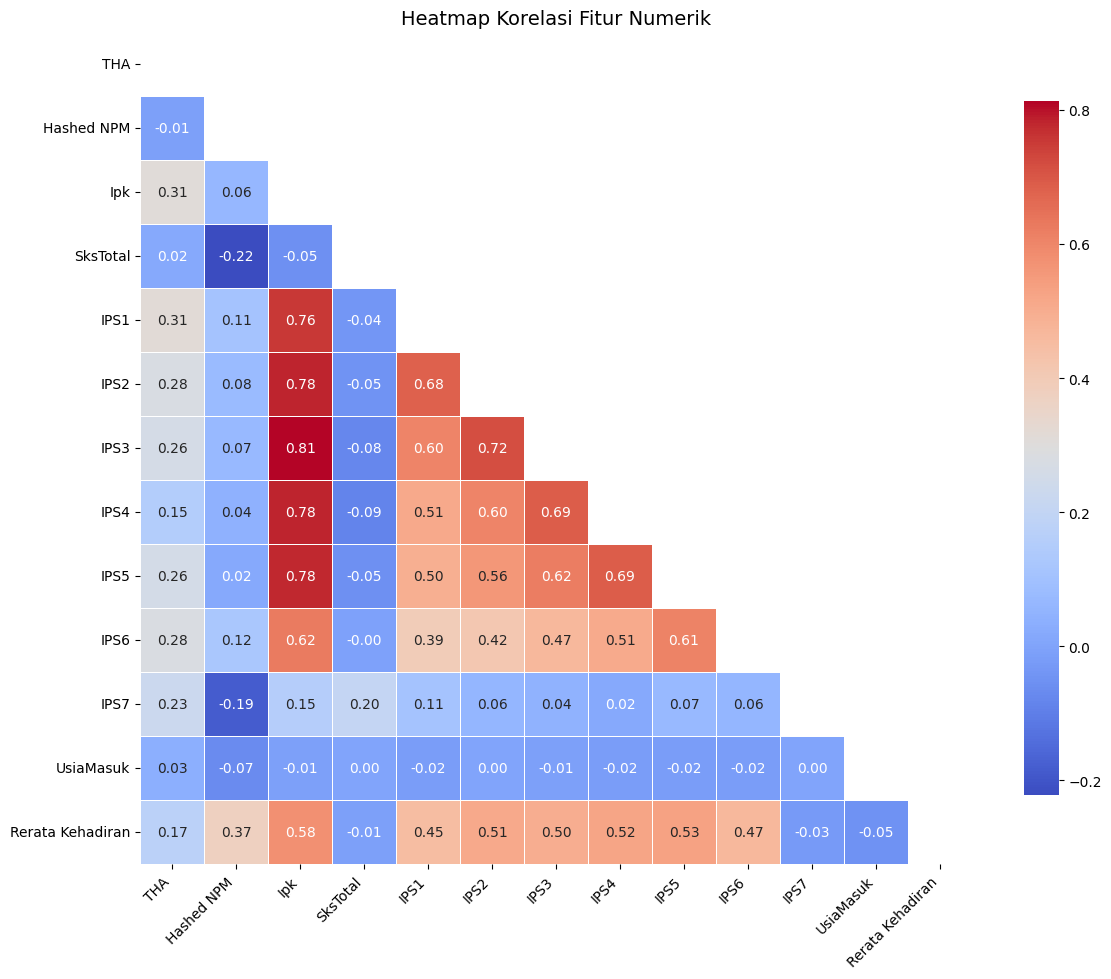

In [ ]:
# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",             # Format angka dua digit desimal
            cmap='coolwarm',
            mask=mask,             # Masking segitiga atas
            square=True,           # Biar kotak
            linewidths=.5,         # Garis antar kotak
            cbar_kws={"shrink": .8})  # Ukuran color bar

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title('Heatmap Korelasi Fitur Numerik', fontsize=14)
plt.tight_layout()
plt.show()

Alasan menggunakan heatmap korelasi seperti diatas :

1. Hanya menampilkan segitiga bawah dari matriks korelasi, sehingga tidak menampilkan informasi yang berulang.(tanpa duplikasi)
2. Membuat tampilannya lebih ringkas dan fokus.
3. Nilai-nilai korelasi ditulis dengan dua desimal, jadi pengguna bisa tahu secara kuantitatif seberapa kuat hubungan antar fitur.
4. Label sumbu X dan Y ditampilkan secara jelas dan tidak bertabrakan. Sangat penting untuk identifikasi variabel yang saling berkorelasi.


Analisis dari heatmap diatas :
1. IPS1 hingga IPS5 sangat berkorelasi tinggi satu sama lain (nilai korelasi sekitar 0.76 – 0.81), ini logis karena performa akademik antar semester sering konsisten.

2. IPK juga memiliki korelasi tinggi dengan nilai IPS semester, terutama IPS3 (0.81) dan IPS2 (0.78) → artinya, performa di semester awal-mid punya pengaruh besar terhadap IPK.

3. Rerata Kehadiran punya korelasi sedang-tinggi dengan IPK (0.58) → ini menarik: mahasiswa yang rajin hadir cenderung punya IPK lebih tinggi.

4. UsiaMasuk, THA, dan Hashed NPM tidak menunjukkan korelasi kuat dengan fitur lain (korelasi mendekati 0).

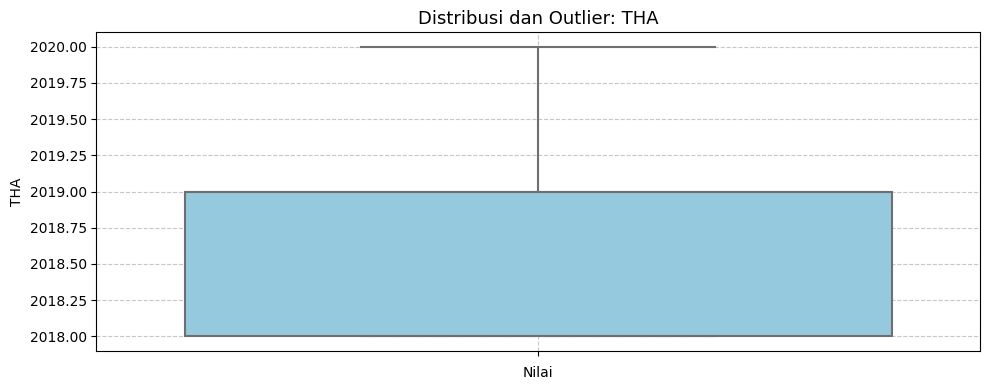

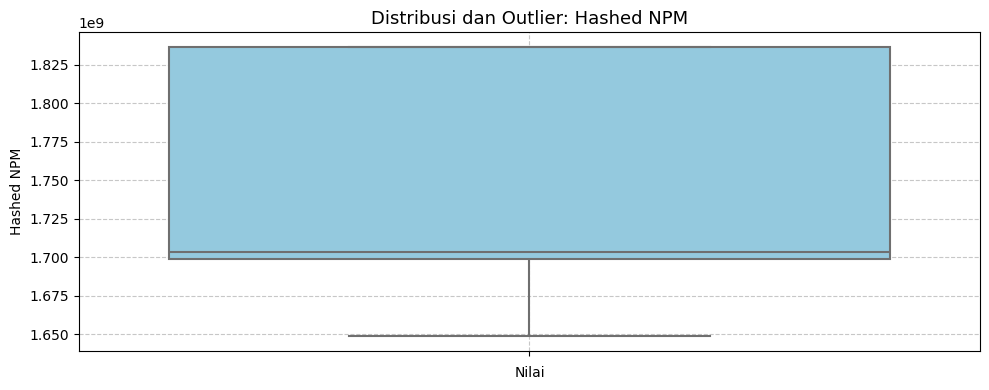

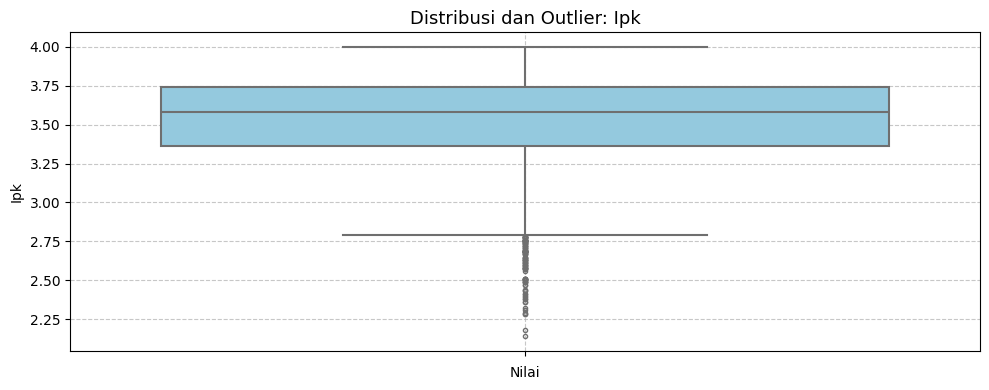

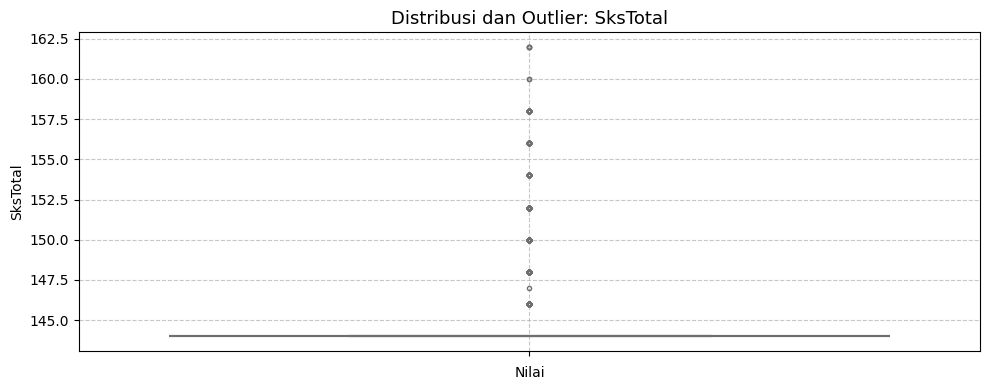

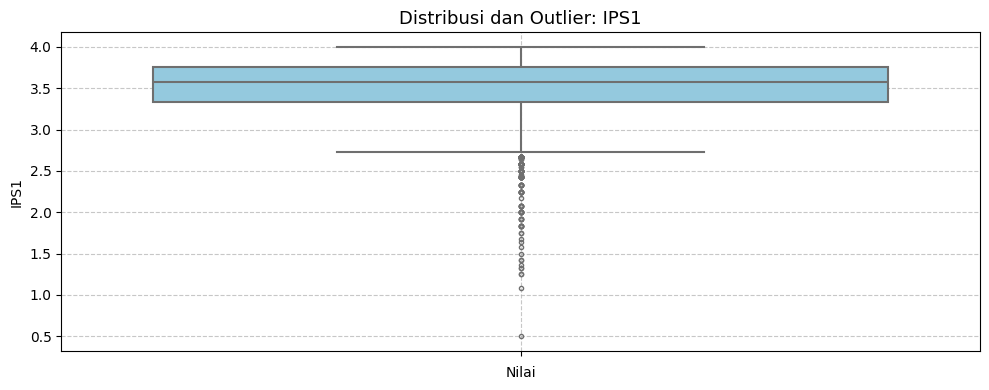

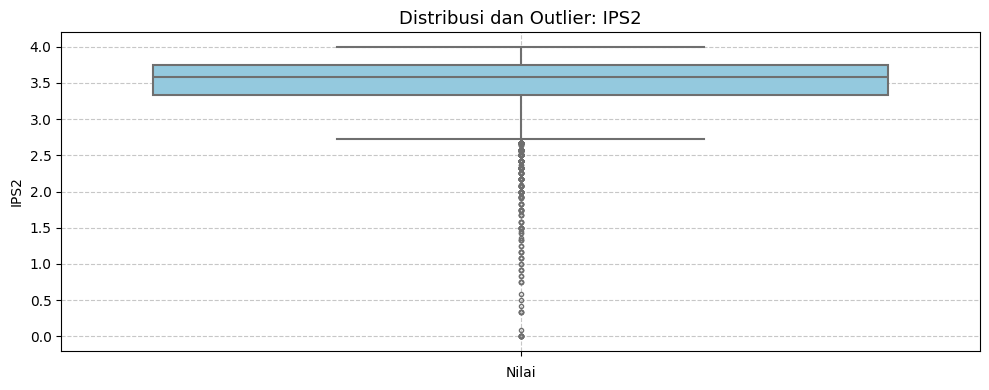

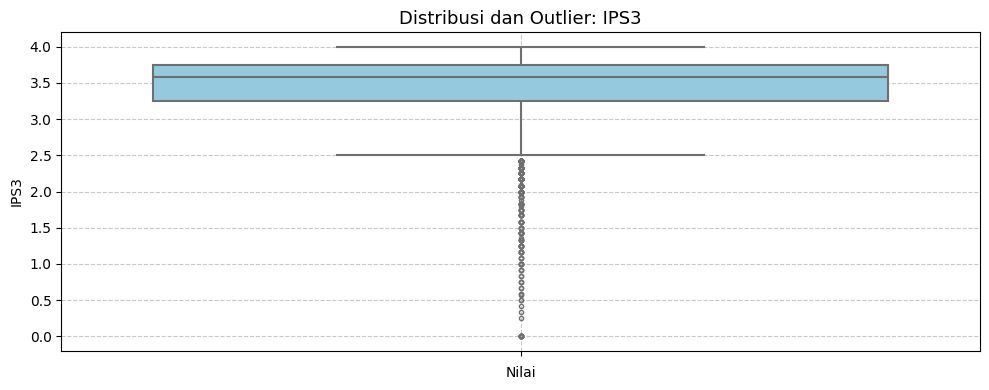

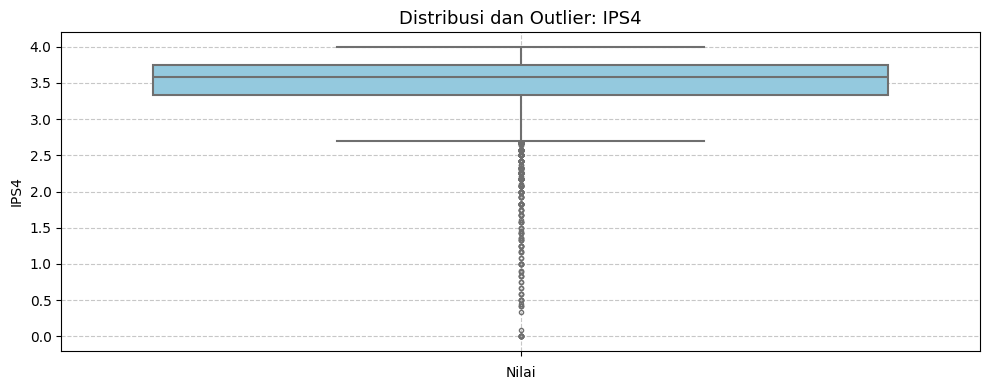

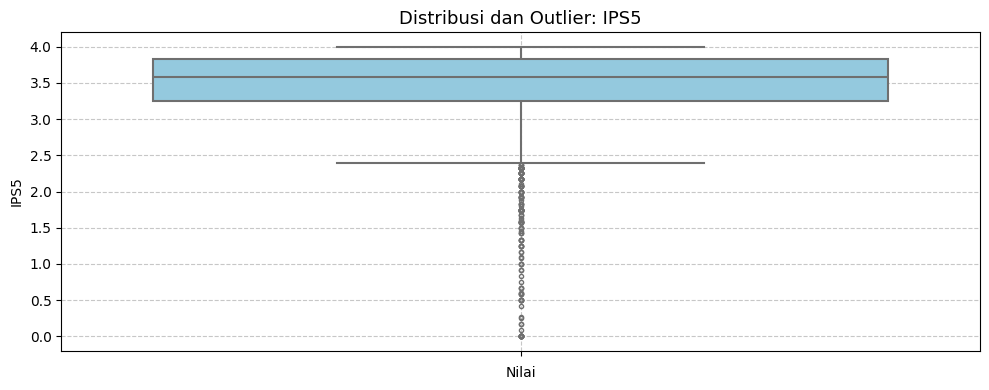

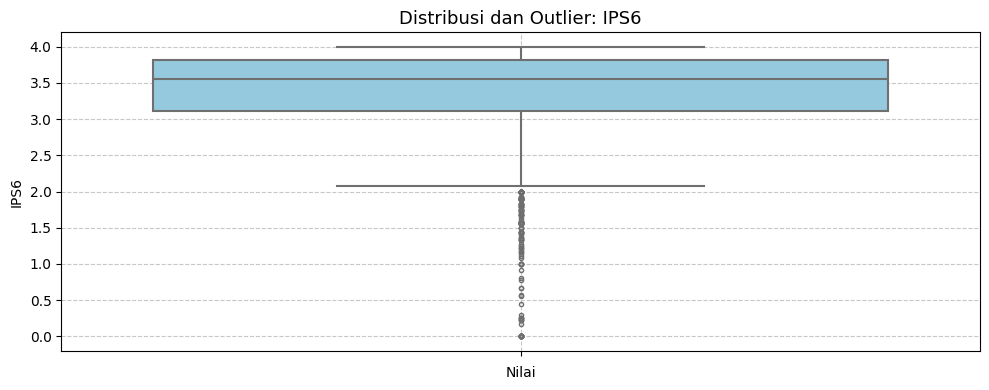

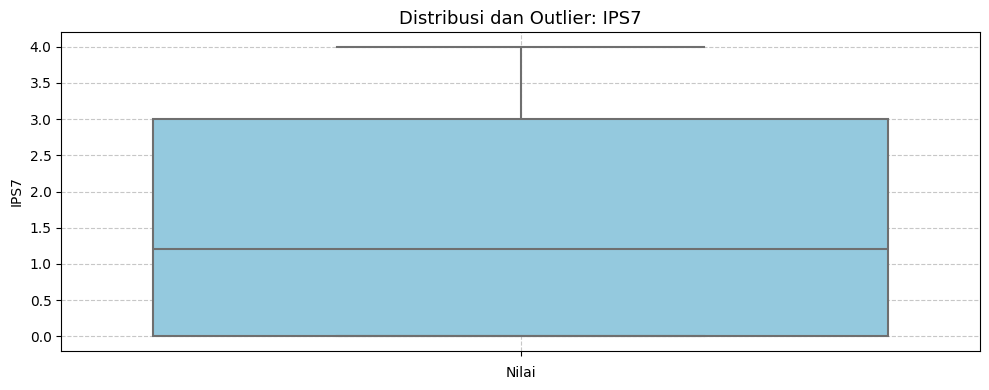

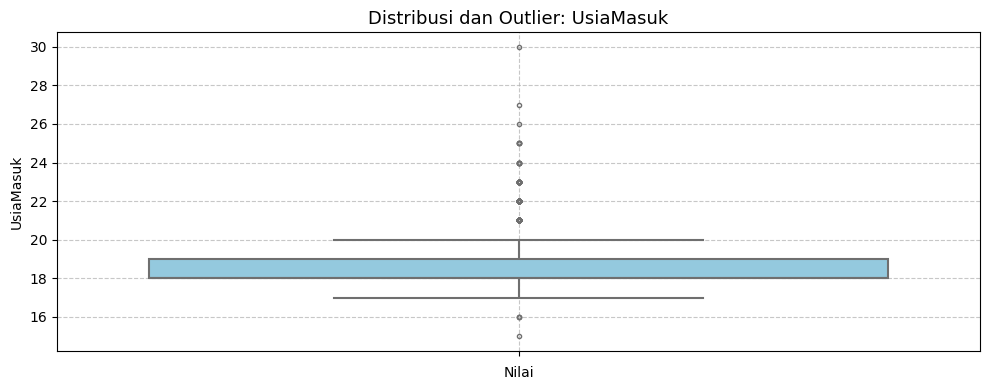

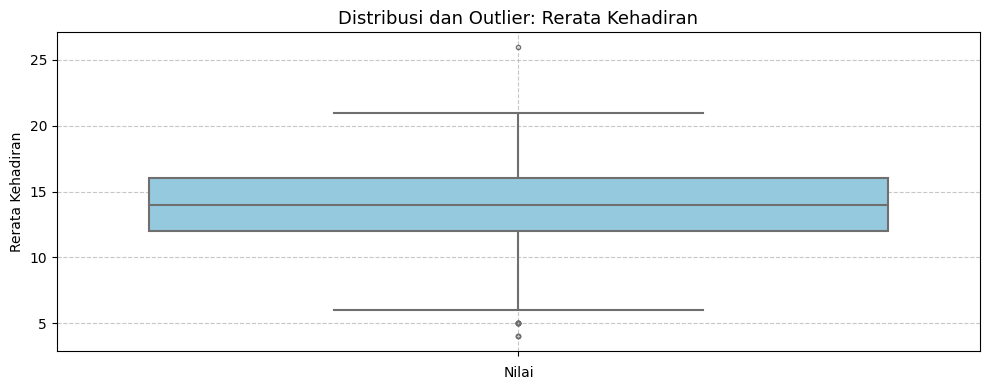

In [ ]:
for col in numerik:
    plt.figure(figsize=(10, 4))  # Ukuran horizontal agar muat
    sns.boxplot(data=df, y=col, color='skyblue', fliersize=3, linewidth=1.5)
    plt.title(f'Distribusi dan Outlier: {col}', fontsize=13)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xlabel('Nilai')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# **Preprocessing Data**

In [ ]:
# Gabungkan kelas 'Memuaskan' → 'Sangat Memuaskan' (agar tidak minor)
df['PredikatKelulusan'] = df['PredikatKelulusan'].replace({
    'Memuaskan': 'Sangat Memuaskan'
  })

In [ ]:
kolom_dihapus = ['Hashed NPM']
df = df.drop(columns=kolom_dihapus)

In [ ]:
# Label encode fitur kategori
kategori = df.select_dtypes(include='object').columns.drop('PredikatKelulusan')
label_encoders = {}
for col in kategori:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Outlier Dectection & Removal

/tmp/ipython-input-20-3134798558.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Jumlah Outlier', y='Kolom', data=df_outlier, palette='viridis')


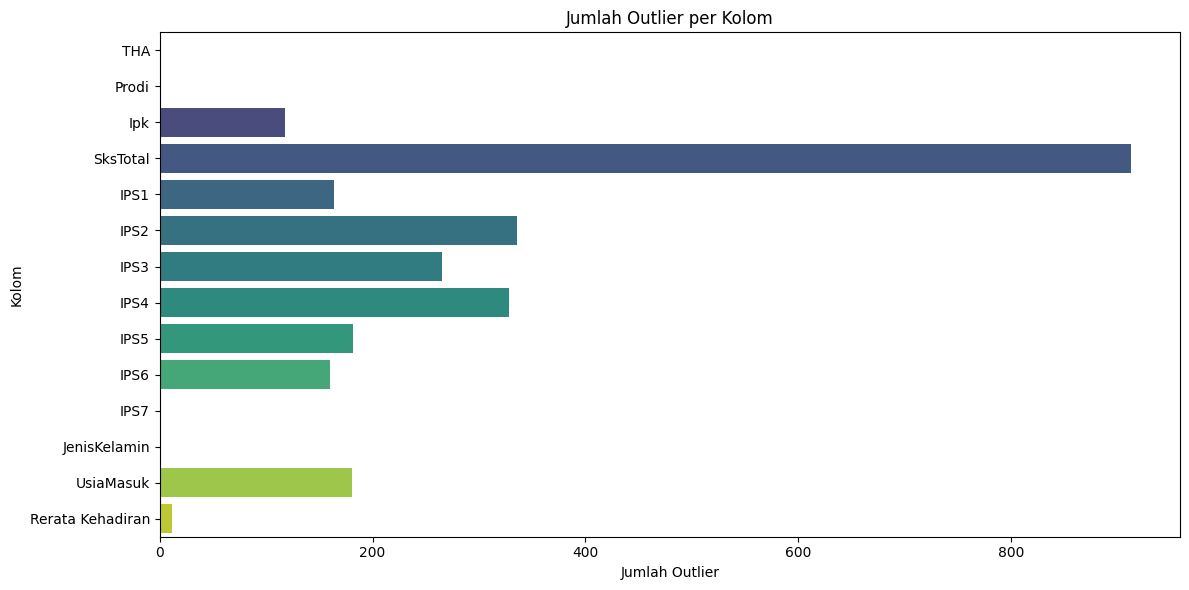

In [ ]:
# Data jumlah outlier per kolom
data_outlier = {
    'Kolom': [
        'THA', 'Prodi', 'Ipk', 'SksTotal', 'IPS1', 'IPS2', 'IPS3',
        'IPS4', 'IPS5', 'IPS6', 'IPS7', 'JenisKelamin', 'UsiaMasuk', 'Rerata Kehadiran'
    ],
    'Jumlah Outlier': [
        0, 0, 118, 913, 164, 336, 265, 328, 182, 160, 0, 0, 181, 12
    ]
}

# Membuat DataFrame
df_outlier = pd.DataFrame(data_outlier)

# Visualisasi bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Jumlah Outlier', y='Kolom', data=df_outlier, palette='viridis')

plt.title('Jumlah Outlier per Kolom')
plt.xlabel('Jumlah Outlier')
plt.ylabel('Kolom')
plt.tight_layout()
plt.show()

In [ ]:
# Fungsi deteksi dan pembersihan outlier (IQR)
def detect_outliers_iqr(data, col):
    Q1, Q3 = data[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    return data[(data[col] < Q1 - 1.5 * IQR) | (data[col] > Q3 + 1.5 * IQR)]

def remove_outliers_iqr(data, col):
    Q1, Q3 = data[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    return data[(data[col] >= Q1 - 1.5 * IQR) & (data[col] <= Q3 + 1.5 * IQR)]


In [ ]:
# Kolom numerik yang akan dicek outlier-nya
kolom_numerik = ['Ipk', 'SksTotal', 'IPS1', 'IPS2', 'IPS3', 'IPS4', 'IPS5', 'IPS6', 'UsiaMasuk']

In [ ]:
# Simpan data asli
df_original = df.copy()

# Buat salinan untuk pembersihan
df_clean = df.copy()
for col in kolom_numerik:
    df_clean = remove_outliers_iqr(df_clean, col)

In [ ]:
print(f"Jumlah data asli: {len(df_original)}")
print(f"Jumlah data bersih: {len(df_clean)}")
print(f"Outlier dibuang: {len(df_original) - len(df_clean)}")

Jumlah data asli: 4533
Jumlah data bersih: 2885
Outlier dibuang: 1648


In [ ]:
print(df_clean.columns)
print(df_clean['SksTotal'].dtype)
print(df_clean['SksTotal'].isnull().sum())

Index(['THA', 'Prodi', 'Ipk', 'SksTotal', 'IPS1', 'IPS2', 'IPS3', 'IPS4',
       'IPS5', 'IPS6', 'IPS7', 'JenisKelamin', 'UsiaMasuk',
       'PredikatKelulusan', 'Rerata Kehadiran'],
      dtype='object')
int64
0


In [ ]:
# Cek indeks data yang termasuk outlier (dibuang setelah pembersihan)
indeks_outlier = df_original.index.difference(df_clean.index)

# Tampilkan baris-baris yang merupakan outlier
outlier_dibuang = df_original.loc[indeks_outlier]

# Tampilkan jumlah dan data outlier yang dibuang
print(f"Jumlah outlier yang dibuang: {len(outlier_dibuang)}")
display(outlier_dibuang)

Jumlah outlier yang dibuang: 1648


,THA,Prodi,Ipk,SksTotal,IPS1,IPS2,IPS3,IPS4,IPS5,IPS6,IPS7,JenisKelamin,UsiaMasuk,PredikatKelulusan,Rerata Kehadiran
4,2018,7,3.82,144,3.83,3.83,4.00,3.67,3.92,3.56,0.00,1,22,Cum Laude,16
15,2018,7,3.25,144,2.67,2.42,2.92,2.75,3.42,3.73,1.40,0,18,Sangat Memuaskan,13
20,2018,7,3.06,144,3.33,2.42,3.33,2.83,3.42,2.78,0.00,0,20,Sangat Memuaskan,12
21,2018,7,3.84,146,3.75,3.92,4.00,3.83,3.67,3.80,0.00,0,19,Cum Laude,16
22,2018,7,2.63,144,3.00,2.58,2.83,2.00,2.58,1.55,0.00,0,19,Cukup,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4528,2020,5,3.84,146,4.00,3.82,3.75,3.67,3.92,3.80,1.60,1,18,Cum Laude,13
4529,2020,5,3.56,146,3.36,3.55,3.42,3.17,3.58,3.92,3.75,0,19,Cum Laude,13
4530,2020,5,3.64,146,3.73,3.55,3.50,3.33,3.83,3.80,4.00,1,19,Cum Laude,12
4531,2020,5,3.58,146,3.91,3.45,3.50,3.17,3.75,3.60,1.60,1,20,Cum Laude,13


In [ ]:
for col in kolom_numerik:
    outliers_col = detect_outliers_iqr(df_original, col)
    outliers_col = outliers_col.loc[outliers_col.index.difference(df_clean.index)]
    print(f"\nOutlier yang dibuang dari kolom {col} ({len(outliers_col)} data):")
    display(outliers_col[[col]])


Outlier yang dibuang dari kolom Ipk (118 data):


,Ipk
22,2.63
84,2.71
109,2.78
187,2.29
230,2.63
...,...
3442,2.71
3502,2.41
3607,2.76
3804,2.75



Outlier yang dibuang dari kolom SksTotal (913 data):


,SksTotal
21,146
33,146
69,148
79,146
90,146
...,...
4528,146
4529,146
4530,146
4531,146



Outlier yang dibuang dari kolom IPS1 (164 data):


,IPS1
15,2.67
163,2.67
190,2.25
230,2.42
240,2.67
...,...
4050,1.64
4085,2.45
4104,2.64
4121,2.55



Outlier yang dibuang dari kolom IPS2 (336 data):


,IPS2
15,2.42
20,2.42
22,2.58
39,2.42
57,2.67
...,...
4121,2.09
4167,2.55
4247,2.55
4457,2.64



Outlier yang dibuang dari kolom IPS3 (265 data):


,IPS3
99,2.17
109,2.33
164,1.50
187,2.25
198,2.42
...,...
4121,1.75
4168,2.17
4173,2.42
4182,2.33



Outlier yang dibuang dari kolom IPS4 (328 data):


,IPS4
22,2.00
37,2.25
39,0.00
86,2.17
160,2.17
...,...
4148,2.50
4173,2.64
4352,2.50
4393,2.33



Outlier yang dibuang dari kolom IPS5 (182 data):


,IPS5
83,1.92
84,2.08
86,2.33
99,0.00
109,2.00
...,...
3481,2.33
3607,1.75
3621,2.00
3804,1.80



Outlier yang dibuang dari kolom IPS6 (160 data):


,IPS6
22,1.55
84,0.22
99,0.00
160,2.00
187,1.44
...,...
3500,1.71
3502,1.58
3504,2.00
4012,2.00



Outlier yang dibuang dari kolom UsiaMasuk (181 data):


,UsiaMasuk
4,22
52,23
86,22
94,21
162,22
...,...
4367,21
4381,21
4389,21
4393,22


In [ ]:
outlier_index_all = set()

for col in kolom_numerik:
    outlier_index = detect_outliers_iqr(df_original, col).index
    outlier_index_all.update(outlier_index)

print(f"Total baris unik yang merupakan outlier di minimal satu kolom: {len(outlier_index_all)}")

Total baris unik yang merupakan outlier di minimal satu kolom: 1536


In [ ]:
print(f"Total data yang dibuang: {len(df_original) - len(df_clean)}")

Total data yang dibuang: 1648


In [ ]:
df_clean['SksTotal'].value_counts()

,count
SksTotal,
144,2885


# Split Data & SMOTE

In [ ]:
# Pisahkan fitur dan target
X = df_clean.drop(columns='PredikatKelulusan')
y = df_clean['PredikatKelulusan']
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

In [ ]:
# Standarisasi numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Terapkan SMOTE (pastikan k_neighbors < jumlah sample kelas terkecil)
min_class = min(Counter(y_train).values())
k = min(5, min_class - 1)
smote = SMOTE(random_state=42, k_neighbors=k)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

<ipython-input-17-119b9793e9a2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=axes[0], palette="pastel")
<ipython-input-17-119b9793e9a2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_smote, ax=axes[1], palette="pastel")


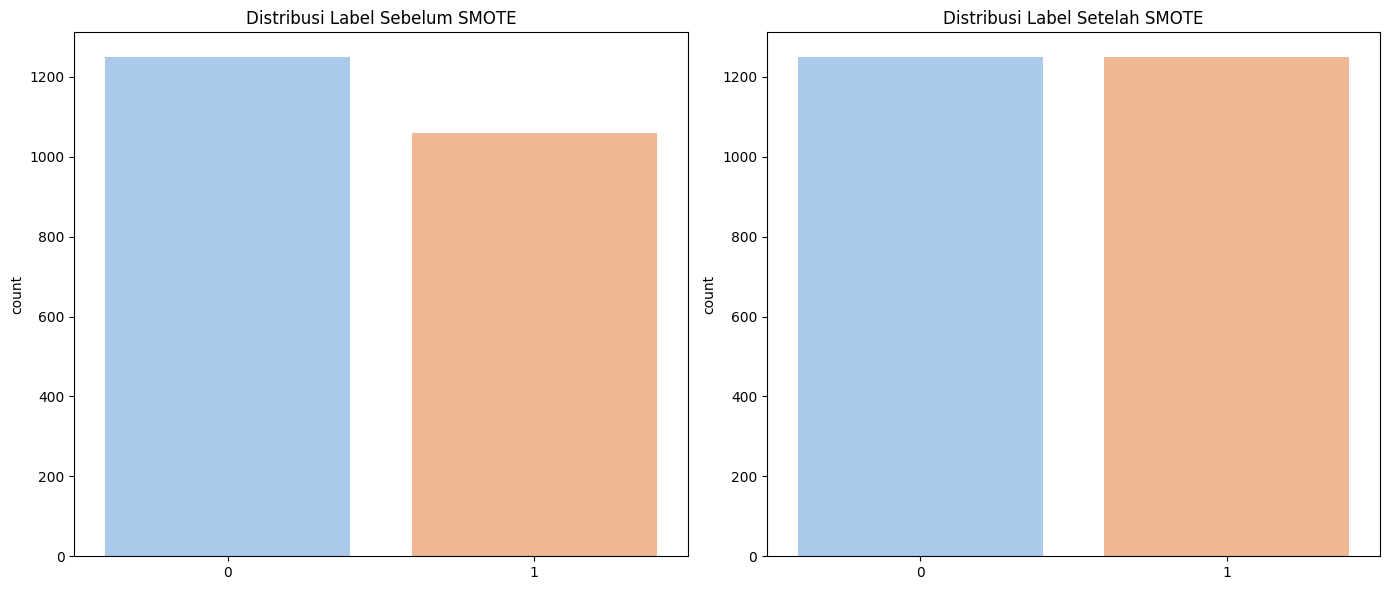

In [ ]:
# Distribusi label sebelum dan sesudah SMOTE
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot(x=y_train, ax=axes[0], palette="pastel")
axes[0].set_title("Distribusi Label Sebelum SMOTE")
sns.countplot(x=y_train_smote, ax=axes[1], palette="pastel")
axes[1].set_title("Distribusi Label Setelah SMOTE")
plt.tight_layout()
plt.show()

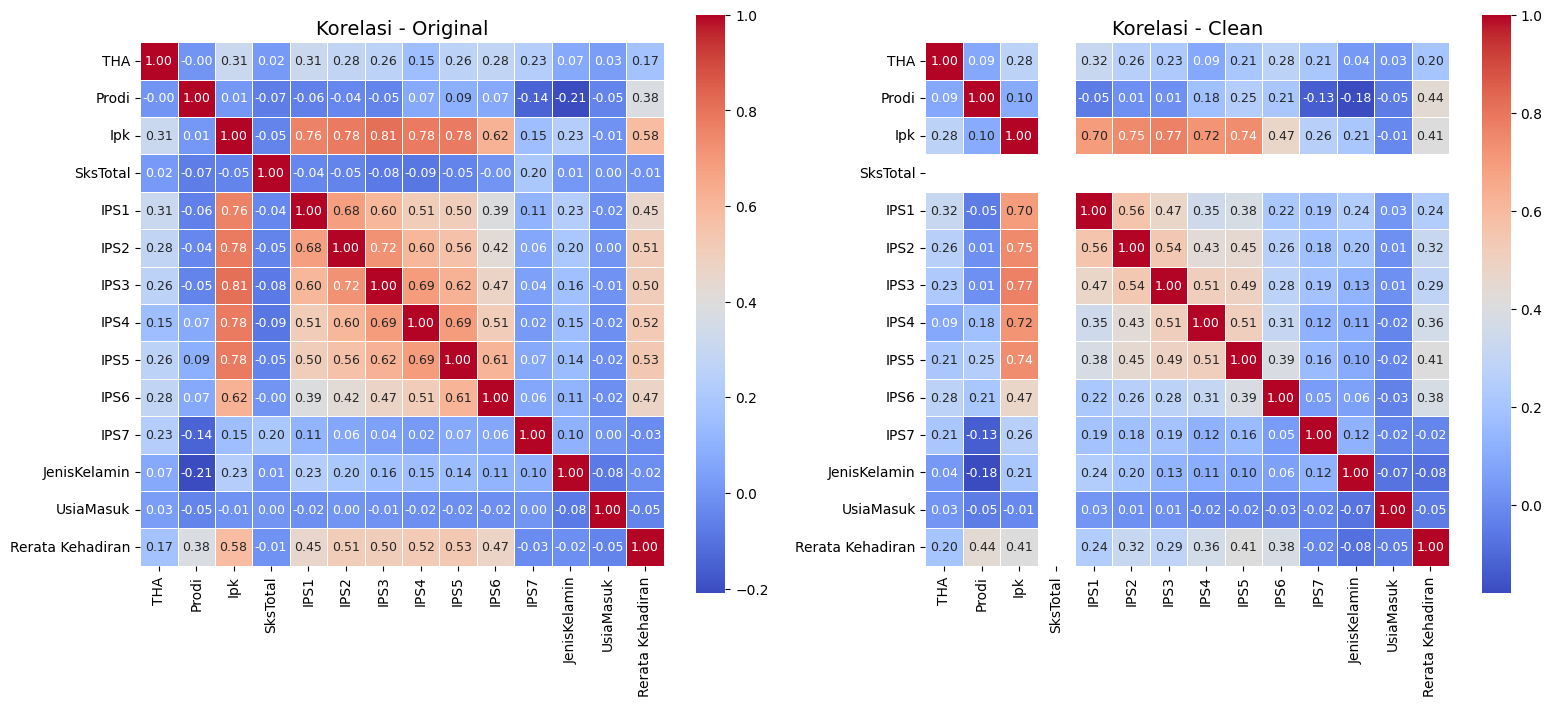

In [ ]:
# Heatmap Korelasi
plt.figure(figsize=(16, 7))

plt.subplot(1, 2, 1)
sns.heatmap(
    df_original.corr(numeric_only=True).round(2),
    annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True,
    annot_kws={"size": 9}
)
plt.title('Korelasi - Original', fontsize=14)

plt.subplot(1, 2, 2)
sns.heatmap(
    df_clean.corr(numeric_only=True).round(2),
    annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True,
    annot_kws={"size": 9}
)
plt.title('Korelasi - Clean', fontsize=14)

plt.tight_layout()
plt.show()

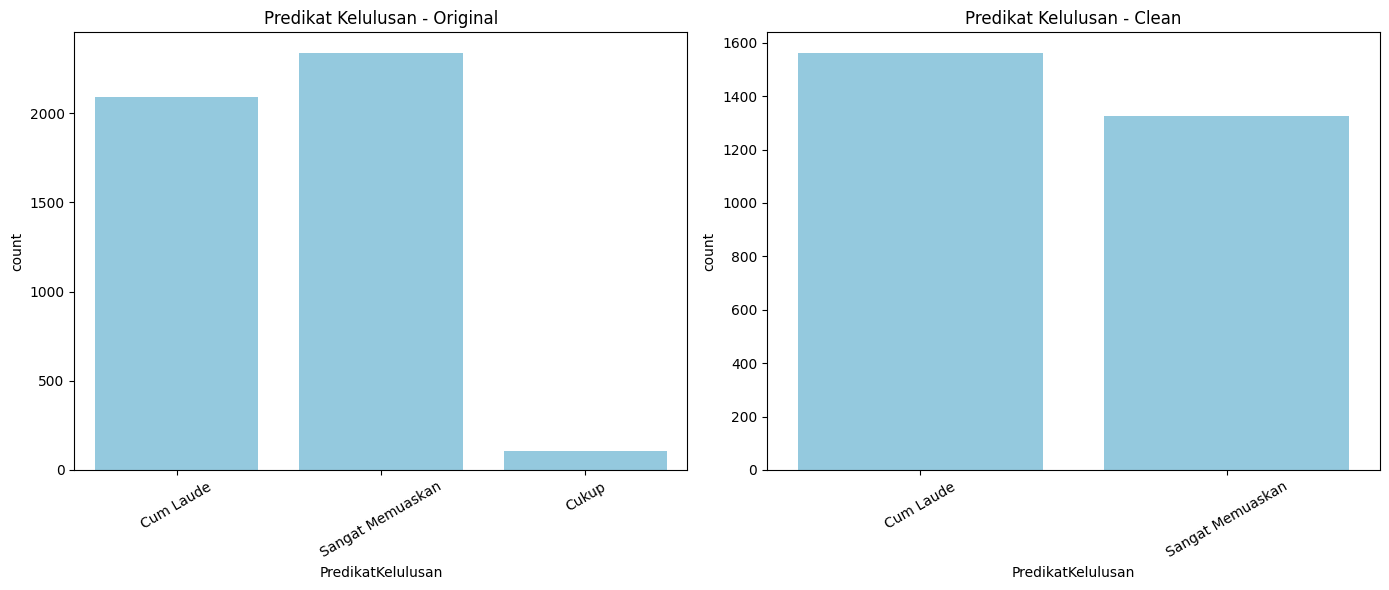

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=df_original, x='PredikatKelulusan', color='skyblue')
plt.title('Predikat Kelulusan - Original')
plt.xticks(rotation=30)

plt.subplot(1, 2, 2)
sns.countplot(data=df_clean, x='PredikatKelulusan', color='skyblue')
plt.title('Predikat Kelulusan - Clean')
plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

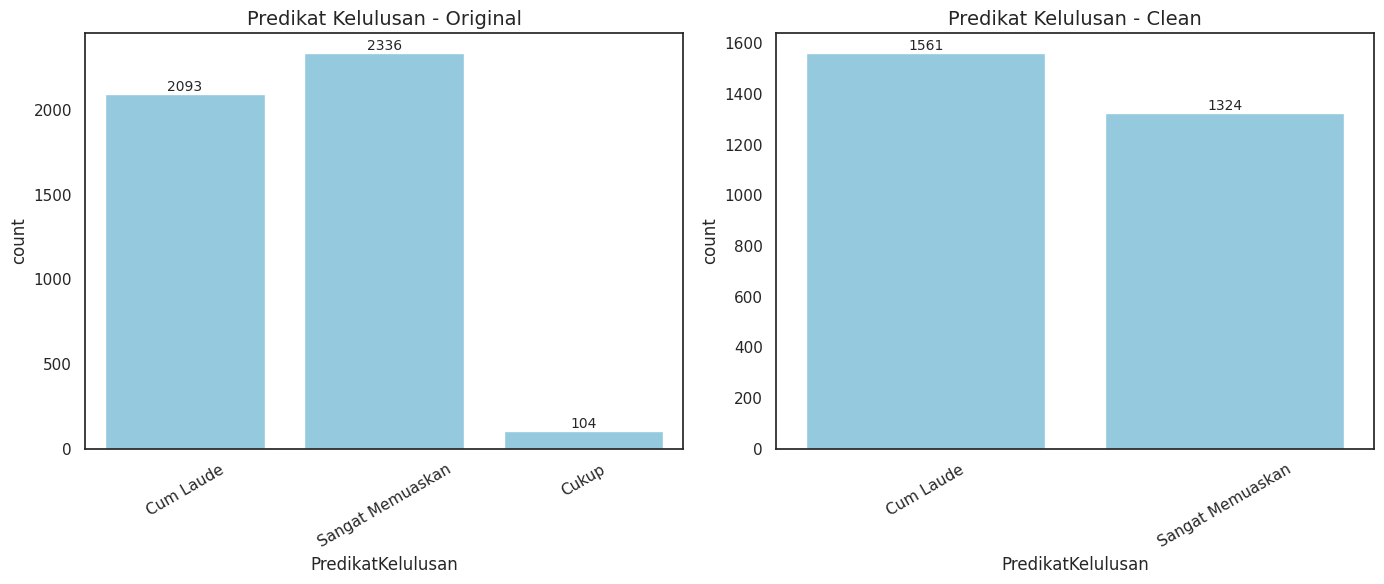

In [ ]:
plt.figure(figsize=(14, 6))

# Plot untuk data original
plt.subplot(1, 2, 1)
ax1 = sns.countplot(data=df_original, x='PredikatKelulusan', color='skyblue')
plt.title('Predikat Kelulusan - Original', fontsize=14)
plt.xticks(rotation=30)
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=10)

# Plot untuk data clean
plt.subplot(1, 2, 2)
ax2 = sns.countplot(data=df_clean, x='PredikatKelulusan', color='skyblue')
plt.title('Predikat Kelulusan - Clean', fontsize=14)
plt.xticks(rotation=30)
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Modeling

In [ ]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_smote, y_train_smote)

y_pred_lr = lr_model.predict(X_test_scaled)

In [ ]:
print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=le_y.classes_))

=== Logistic Regression ===
Accuracy: 0.8076256499133448
Classification Report:
                  precision    recall  f1-score   support

       Cum Laude       0.80      0.85      0.83       312
Sangat Memuaskan       0.81      0.75      0.78       265

        accuracy                           0.81       577
       macro avg       0.81      0.80      0.81       577
    weighted avg       0.81      0.81      0.81       577



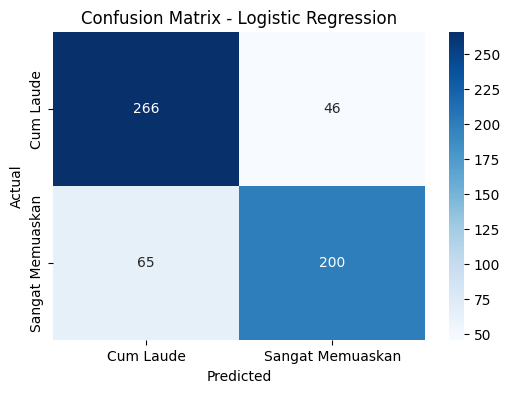

In [ ]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues',
            xticklabels=le_y.classes_, yticklabels=le_y.classes_)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_smote, y_train_smote)

y_pred_nb = nb_model.predict(X_test_scaled)

In [ ]:
print("\n=== Naive Bayes ===")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:")
print(classification_report(y_test, y_pred_nb, target_names=le_y.classes_))


=== Naive Bayes ===
Accuracy: 0.7972270363951474
Classification Report:
                  precision    recall  f1-score   support

       Cum Laude       0.79      0.86      0.82       312
Sangat Memuaskan       0.81      0.72      0.77       265

        accuracy                           0.80       577
       macro avg       0.80      0.79      0.79       577
    weighted avg       0.80      0.80      0.80       577



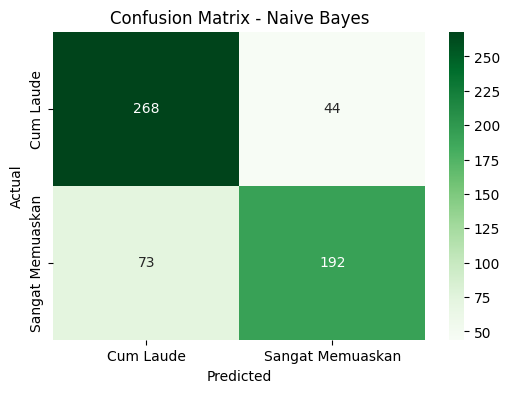

In [ ]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Greens',
            xticklabels=le_y.classes_, yticklabels=le_y.classes_)
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

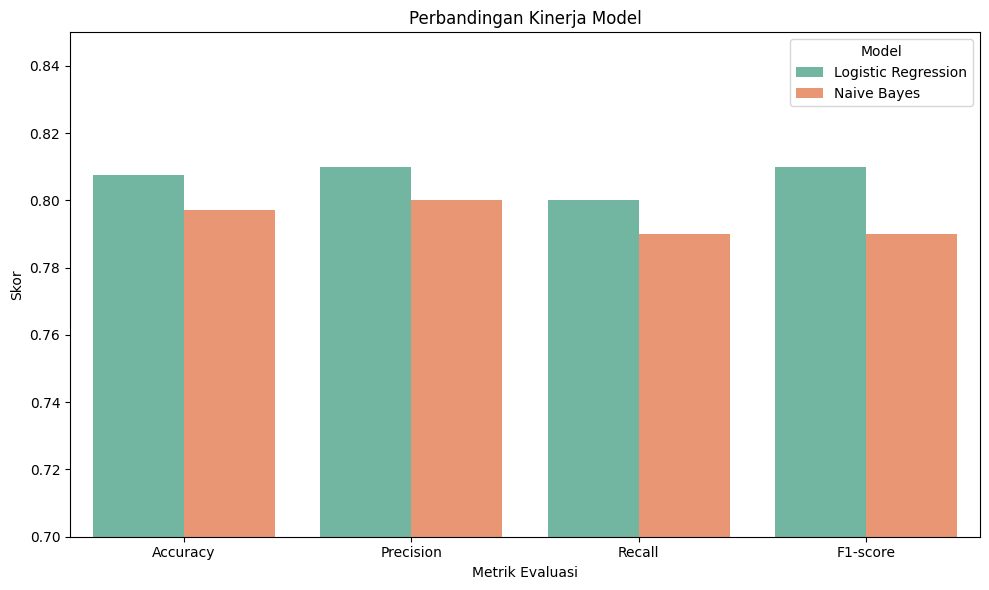

In [ ]:
# Data hasil evaluasi
data_evaluation = {
    'Model': ['Logistic Regression', 'Naive Bayes'],
    'Accuracy': [0.8076, 0.7972],
    'Precision': [0.81, 0.80],
    'Recall': [0.80, 0.79],
    'F1-score': [0.81, 0.79]
}

# Konversi ke DataFrame
df_eval = pd.DataFrame(data_evaluation)

# Mengubah data menjadi long format agar mudah divisualisasikan dengan seaborn
df_melted = df_eval.melt(id_vars='Model', var_name='Metric', value_name='Value')

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Model', data=df_melted, palette='Set2')

plt.ylim(0.7, 0.85)
plt.title('Perbandingan Kinerja Model')
plt.ylabel('Skor')
plt.xlabel('Metrik Evaluasi')
plt.legend(title='Model')
plt.tight_layout()
plt.show()

# KEEP DULU

In [ ]:
# --- Step 2: Pisahkan fitur (X) dan target (y) ---
X = df.drop(columns='PredikatKelulusan')
y = df['PredikatKelulusan']

In [ ]:
# Encode label y (Target)
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)  # y_encoded is numeric

In [ ]:
# --- Step 3: Split data ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

In [ ]:
# Tampilkan distribusi label sebelum SMOTE
print("Distribusi label sebelum SMOTE:", dict(Counter(y_train)))

Distribusi label sebelum SMOTE: {np.int64(1): 1674, np.int64(2): 1869, np.int64(0): 83}


In [ ]:
# --- Step 4: Standarisasi fitur X SAJA ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# --- Step 5: Terapkan SMOTE ---
# Hitung distribusi label untuk deteksi kelas minor
label_counts = Counter(y_train)
min_class = min(label_counts.values())

In [ ]:
# Cegah error: sesuaikan k_neighbors jika perlu
k = min(5, min_class - 1)  # k_neighbors harus < jumlah sample kelas terkecil

smote = SMOTE(random_state=42, k_neighbors=k)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print("Distribusi label setelah SMOTE:", dict(Counter(y_train_smote)))

Distribusi label setelah SMOTE: {np.int64(1): 1869, np.int64(2): 1869, np.int64(0): 1869}


<ipython-input-25-4aaad6ae33a9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=axes[0], palette="pastel")
<ipython-input-25-4aaad6ae33a9>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_smote, ax=axes[1], palette="pastel")


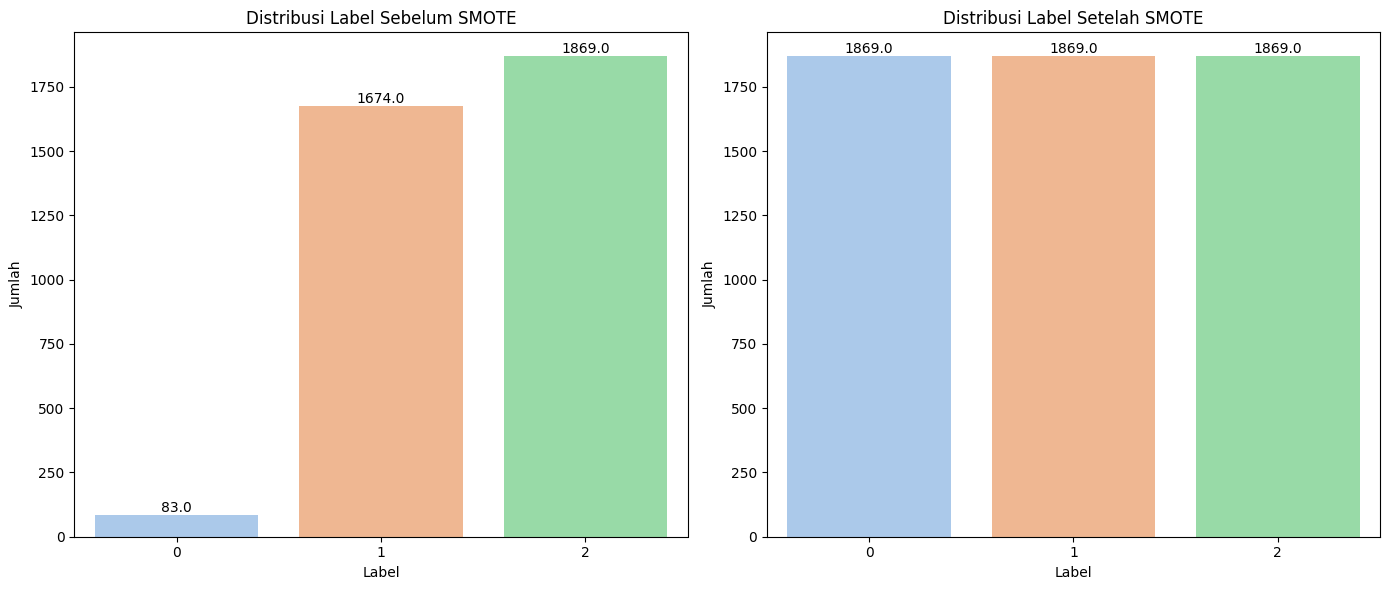

In [ ]:
# Buat figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot sebelum SMOTE
sns.countplot(x=y_train, ax=axes[0], palette="pastel")
axes[0].set_title("Distribusi Label Sebelum SMOTE")
axes[0].set_xlabel("Label")
axes[0].set_ylabel("Jumlah")
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=10)

# Plot sesudah SMOTE
sns.countplot(x=y_train_smote, ax=axes[1], palette="pastel")
axes[1].set_title("Distribusi Label Setelah SMOTE")
axes[1].set_xlabel("Label")
axes[1].set_ylabel("Jumlah")
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# Simpan kolom target sebelum proses scaling
target_col = 'PredikatKelulusan'
y = df[target_col]  # Jangan modifikasi ini
X = df.drop(columns=[target_col])

In [ ]:
# Label encoding untuk fitur kategorikal (jika ada)
kategori = X.select_dtypes(include='object').columns

In [ ]:
label_encoders = {}
for col in kategori:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [ ]:
# Gabungkan kembali X dan y menjadi df baru
df = pd.concat([X, y], axis=1)

In [ ]:
print("Dataset setelah preprocessing:")
display(df.head())

Dataset setelah preprocessing:


,THA,Prodi,Ipk,SksTotal,IPS1,IPS2,IPS3,IPS4,IPS5,IPS6,IPS7,JenisKelamin,UsiaMasuk,Rerata Kehadiran,PredikatKelulusan
0,2018,7,3.72,144,3.75,3.50,3.42,3.75,3.92,4.00,0.0,0,20,16,Cum Laude
1,2018,7,3.49,144,3.42,3.25,3.50,3.75,3.33,2.67,0.0,0,19,16,Sangat Memuaskan
2,2018,7,3.97,144,3.92,4.00,3.92,4.00,4.00,3.00,4.0,0,19,17,Cum Laude
3,2018,7,3.57,144,3.25,3.42,3.42,3.83,3.50,3.50,0.0,0,19,16,Sangat Memuaskan
4,2018,7,3.82,144,3.83,3.83,4.00,3.67,3.92,3.56,0.0,1,22,16,Cum Laude


In [ ]:
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower) | (data[col] > upper)]
    return outliers

In [ ]:
#Cek outlier untuk semua kolom numerik
numerik = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerik:
    outliers = detect_outliers_iqr(df, col)
    print(f"Kolom: {col}")
    print(f"Jumlah outlier: {len(outliers)}")
    print("-" * 30)

Kolom: THA
Jumlah outlier: 0
------------------------------
Kolom: Prodi
Jumlah outlier: 0
------------------------------
Kolom: Ipk
Jumlah outlier: 118
------------------------------
Kolom: SksTotal
Jumlah outlier: 913
------------------------------
Kolom: IPS1
Jumlah outlier: 164
------------------------------
Kolom: IPS2
Jumlah outlier: 336
------------------------------
Kolom: IPS3
Jumlah outlier: 265
------------------------------
Kolom: IPS4
Jumlah outlier: 328
------------------------------
Kolom: IPS5
Jumlah outlier: 182
------------------------------
Kolom: IPS6
Jumlah outlier: 160
------------------------------
Kolom: IPS7
Jumlah outlier: 0
------------------------------
Kolom: JenisKelamin
Jumlah outlier: 0
------------------------------
Kolom: UsiaMasuk
Jumlah outlier: 181
------------------------------
Kolom: Rerata Kehadiran
Jumlah outlier: 12
------------------------------


In [ ]:
df['is_outlier'] = 0

for col in ['Ipk', 'SksTotal', 'IPS1', 'IPS2', 'IPS3', 'IPS4', 'IPS5', 'IPS6', 'UsiaMasuk']:
    outliers = detect_outliers_iqr(df, col)
    df.loc[outliers.index, 'is_outlier'] = 1

In [ ]:
df_original = df.copy()

In [ ]:
kolom_outlier = ['Ipk', 'SksTotal', 'IPS1', 'IPS2', 'IPS3', 'IPS4', 'IPS5', 'IPS6', 'UsiaMasuk']

In [ ]:
df_clean = df.copy()

In [ ]:
# Fungsi untuk menghapus outlier menggunakan IQR
def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] >= lower) & (data[col] <= upper)]

In [ ]:
# Bersihkan semua kolom outlier
for col in kolom_outlier:
    df_clean = remove_outliers_iqr(df_clean, col)

In [ ]:
print(f"Jumlah data (original): {len(df_original)}")
print(f"Jumlah data (clean): {len(df_clean)}")
print(f"Data yang dibuang karena outlier: {len(df_original) - len(df_clean)}")

Jumlah data (original): 4533
Jumlah data (clean): 2885
Data yang dibuang karena outlier: 1648


In [ ]:
# Statistik numerik dari kedua dataset
print("Statistik Deskriptif Dataset Asli")
display(df_original.describe())

print("\nStatistik Deskriptif Dataset Bersih")
display(df_clean.describe())

Statistik Deskriptif Dataset Asli


,THA,Prodi,Ipk,SksTotal,IPS1,IPS2,IPS3,IPS4,IPS5,IPS6,IPS7,JenisKelamin,UsiaMasuk,Rerata Kehadiran,is_outlier
count,4533.000000,4533.000000,4533.000000,4533.000000,4533.000000,4533.000000,4533.000000,4533.000000,4533.000000,4533.000000,4533.000000,4533.000000,4533.000000,4533.000000,4533.000000
mean,2018.822413,7.386278,3.522813,144.680124,3.512226,3.454763,3.423446,3.459133,3.444825,3.382941,1.471741,0.272226,18.590117,13.885947,0.338848
std,0.773577,2.923360,0.299745,1.859601,0.376609,0.506525,0.551509,0.534763,0.537098,0.611164,1.552881,0.445155,0.986497,2.448590,0.473370
min,2018.000000,0.000000,2.140000,144.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,4.000000,0.000000
25%,2018.000000,5.000000,3.360000,144.000000,3.330000,3.330000,3.250000,3.330000,3.250000,3.110000,0.000000,0.000000,18.000000,12.000000,0.000000
50%,2019.000000,7.000000,3.580000,144.000000,3.580000,3.580000,3.580000,3.580000,3.580000,3.560000,1.200000,0.000000,18.000000,14.000000,0.000000
75%,2019.000000,10.000000,3.740000,144.000000,3.750000,3.750000,3.750000,3.750000,3.830000,3.820000,3.000000,1.000000,19.000000,16.000000,1.000000
max,2020.000000,12.000000,4.000000,162.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,30.000000,26.000000,1.000000



Statistik Deskriptif Dataset Bersih


,THA,Prodi,Ipk,SksTotal,IPS1,IPS2,IPS3,IPS4,IPS5,IPS6,IPS7,JenisKelamin,UsiaMasuk,Rerata Kehadiran,is_outlier
count,2885.000000,2885.000000,2885.000000,2885.0,2885.000000,2885.000000,2885.000000,2885.000000,2885.000000,2885.000000,2885.000000,2885.000000,2885.000000,2885.000000,2885.0
mean,2018.801386,7.543847,3.618932,144.0,3.594281,3.593289,3.591816,3.632433,3.597029,3.515612,1.275511,0.297054,18.454766,14.506412,0.0
std,0.742320,2.790768,0.190658,0.0,0.258638,0.269558,0.278669,0.259216,0.284018,0.433648,1.588160,0.457040,0.710372,1.931663,0.0
min,2018.000000,0.000000,2.900000,144.0,2.750000,2.750000,2.750000,2.830000,2.830000,2.220000,0.000000,0.000000,17.000000,8.000000,0.0
25%,2018.000000,5.000000,3.490000,144.0,3.420000,3.420000,3.420000,3.500000,3.420000,3.290000,0.000000,0.000000,18.000000,13.000000,0.0
50%,2019.000000,7.000000,3.640000,144.0,3.640000,3.640000,3.670000,3.670000,3.670000,3.670000,0.000000,0.000000,18.000000,15.000000,0.0
75%,2019.000000,10.000000,3.760000,144.0,3.820000,3.820000,3.830000,3.830000,3.830000,3.890000,3.000000,1.000000,19.000000,16.000000,0.0
max,2020.000000,12.000000,4.000000,144.0,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,20.000000,26.000000,0.0


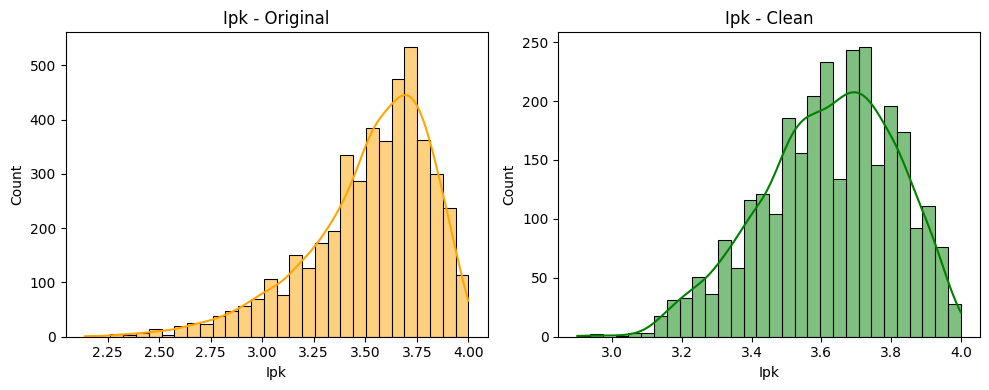

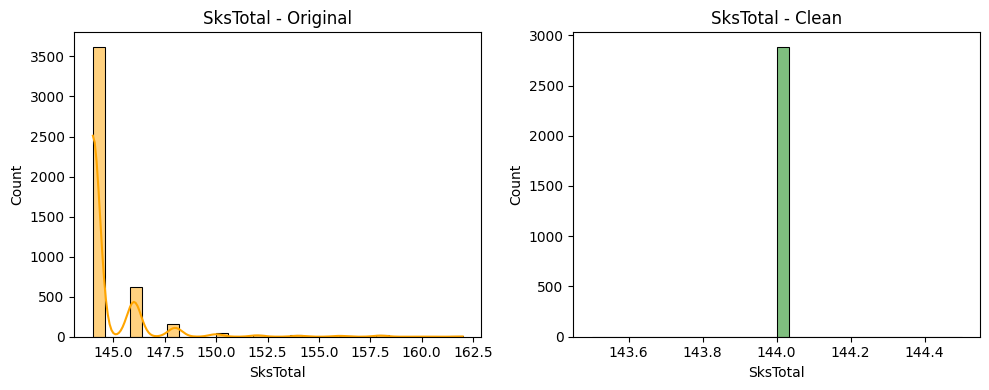

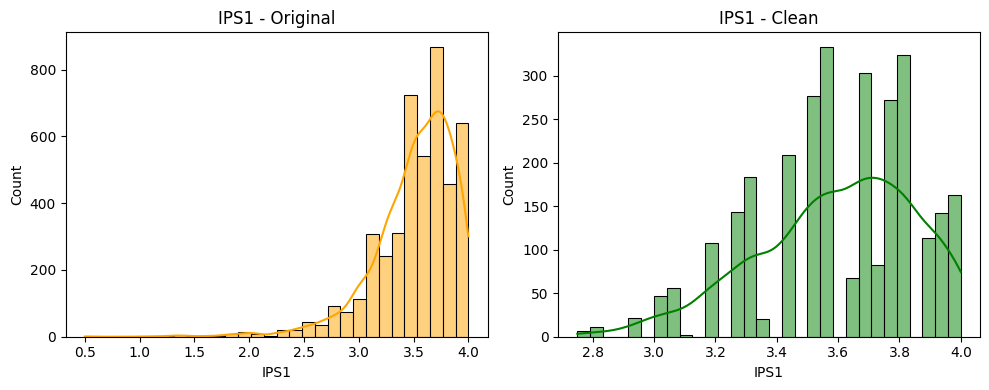

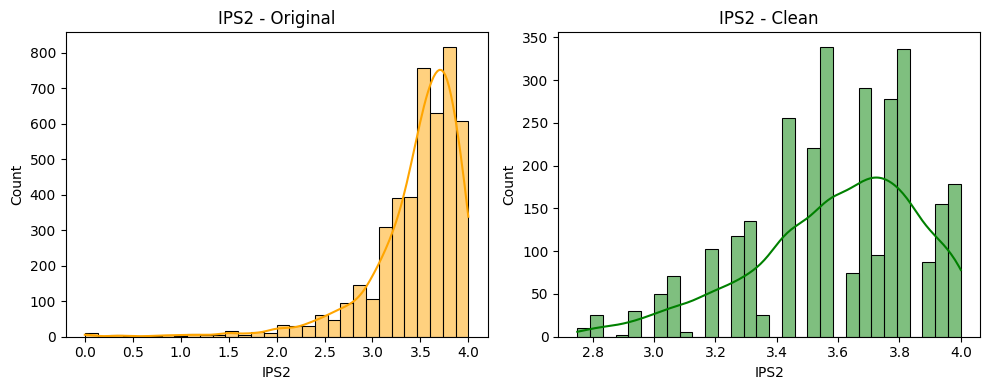

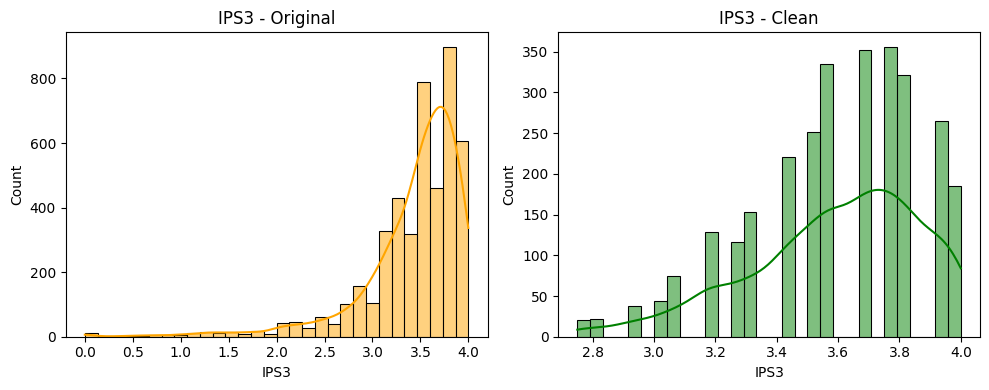

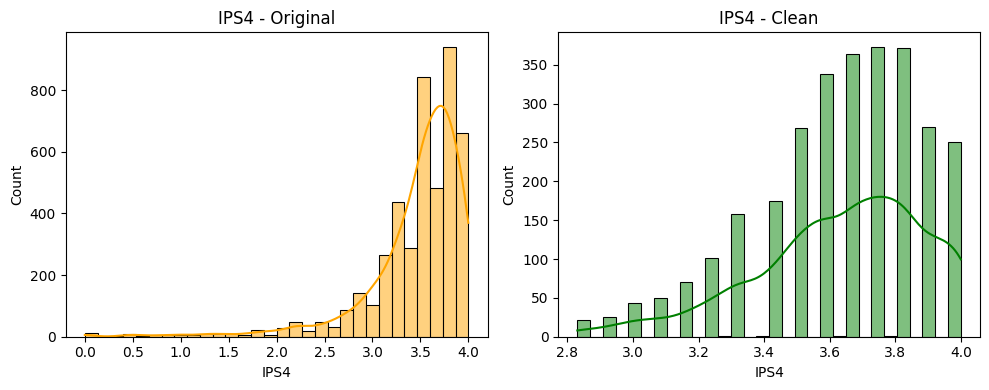

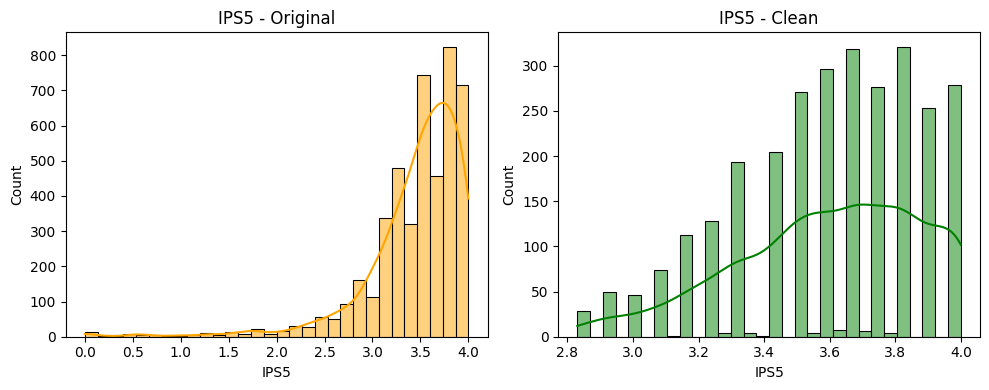

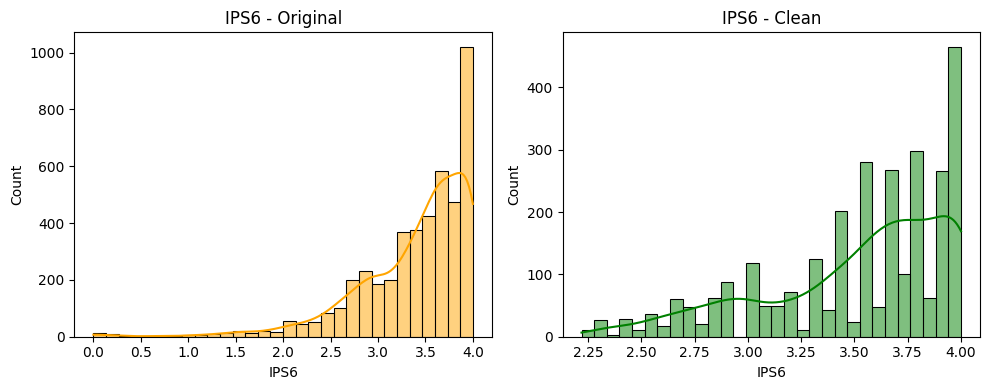

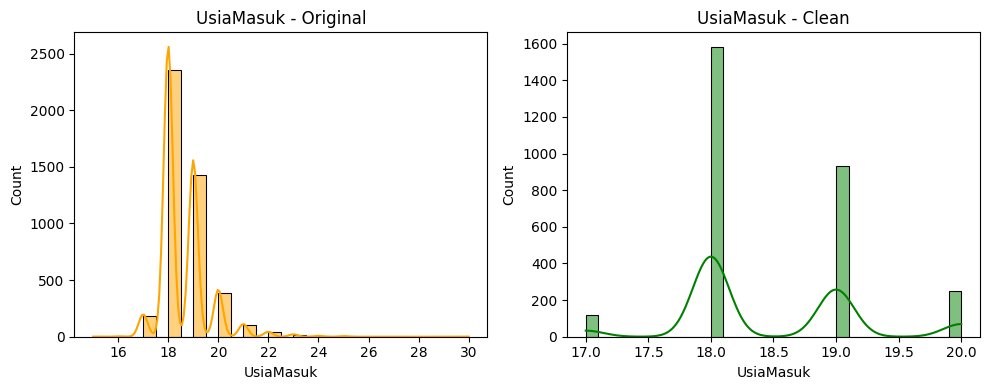

In [ ]:
numerik = ['Ipk', 'SksTotal', 'IPS1', 'IPS2', 'IPS3', 'IPS4', 'IPS5', 'IPS6', 'UsiaMasuk']

for col in numerik:
    plt.figure(figsize=(10, 4))

    # Histogram original
    plt.subplot(1, 2, 1)
    sns.histplot(df_original[col], bins=30, kde=True, color='orange')
    plt.title(f'{col} - Original')

    # Histogram clean
    plt.subplot(1, 2, 2)
    sns.histplot(df_clean[col], bins=30, kde=True, color='green')
    plt.title(f'{col} - Clean')

    plt.tight_layout()
    plt.show()

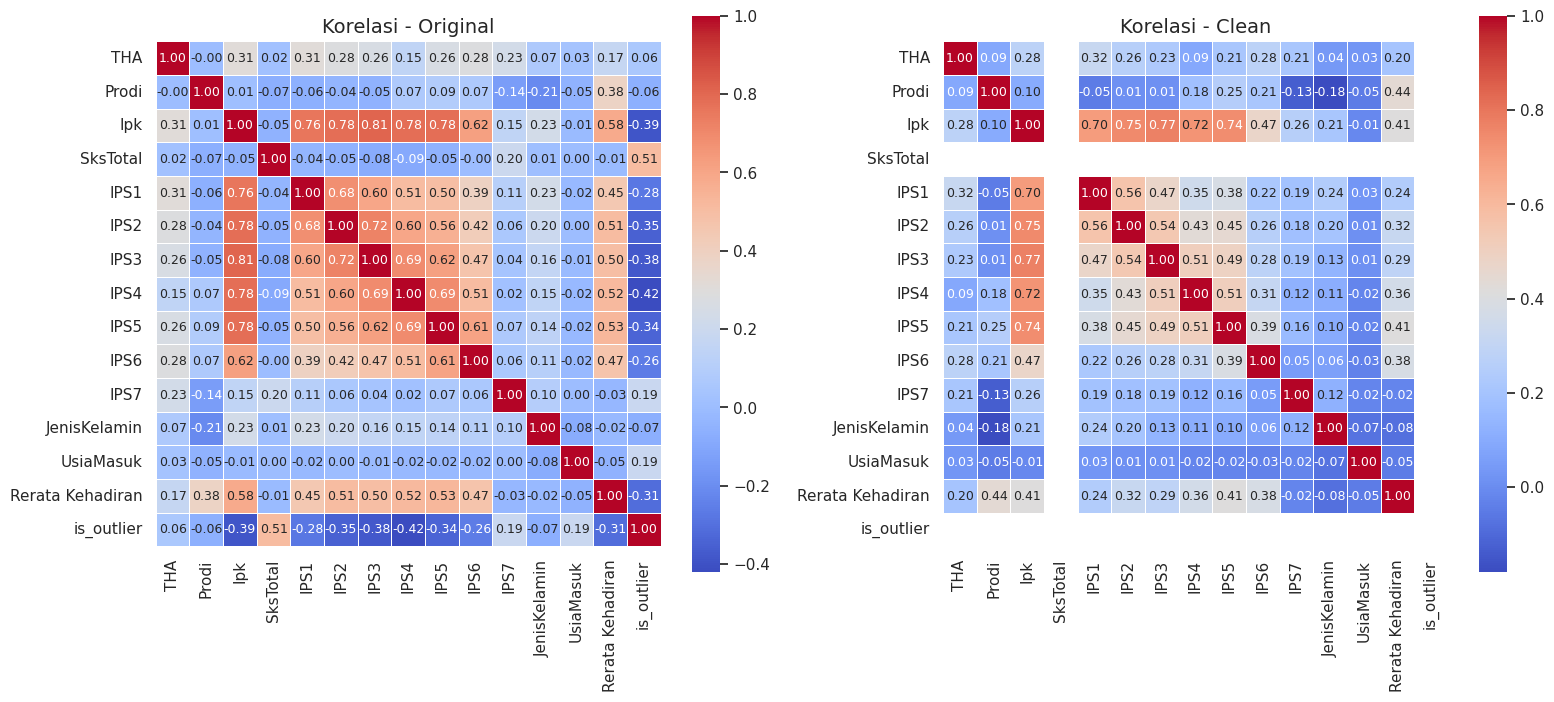

In [ ]:
# Set style
sns.set(style="white")

# Buat figure
plt.figure(figsize=(16, 7))

# Heatmap original
plt.subplot(1, 2, 1)
sns.heatmap(
    df_original.corr(numeric_only=True).round(2),  # Bulatkan nilai korelasi
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    square=True,
    annot_kws={"size": 9}
)
plt.title('Korelasi - Original', fontsize=14)

# Heatmap clean
plt.subplot(1, 2, 2)
sns.heatmap(
    df_clean.corr(numeric_only=True).round(2),
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    square=True,
    annot_kws={"size": 9}
)
plt.title('Korelasi - Clean', fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Misalnya label kelulusan berada di kolom 'PredikatKelulusan'
# Dan fitur lainnya adalah kolom numerik
X = df.drop(columns=['PredikatKelulusan'])
y = df['PredikatKelulusan']

In [ ]:
# One-hot encoding untuk fitur kategorikal (otomatis mendeteksi kolom string)
X_encoded = pd.get_dummies(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Scaling hanya fitur numerik hasil encoding
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
y_pred_nb = nb_model.predict(X_test_scaled)

In [ ]:
# Logistic Regression report
print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr))

# Naive Bayes report
print("=== Naive Bayes ===")
print(classification_report(y_test, y_pred_nb))

=== Logistic Regression ===
                  precision    recall  f1-score   support

           Cukup       1.00      0.86      0.92        21
       Cum Laude       0.83      0.88      0.86       419
       Memuaskan       0.87      0.93      0.90        42
Sangat Memuaskan       0.87      0.82      0.84       425

        accuracy                           0.85       907
       macro avg       0.89      0.87      0.88       907
    weighted avg       0.86      0.85      0.85       907

=== Naive Bayes ===
                  precision    recall  f1-score   support

           Cukup       0.65      0.71      0.68        21
       Cum Laude       0.76      0.91      0.83       419
       Memuaskan       0.58      0.81      0.67        42
Sangat Memuaskan       0.88      0.66      0.76       425

        accuracy                           0.79       907
       macro avg       0.72      0.78      0.74       907
    weighted avg       0.80      0.79      0.78       907



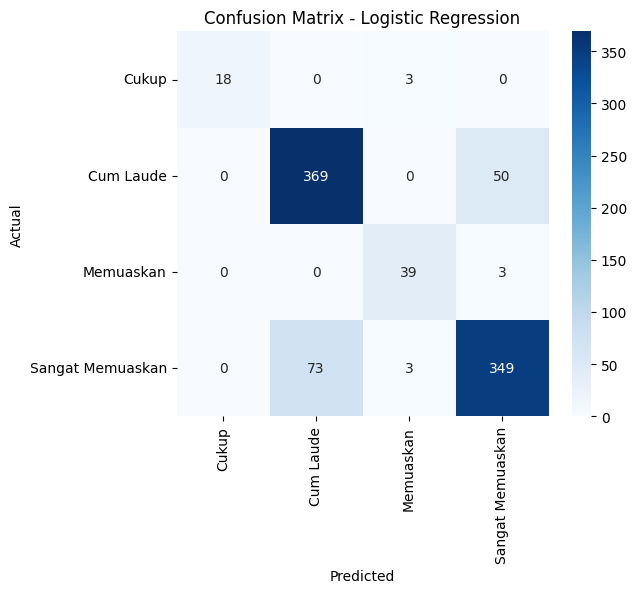

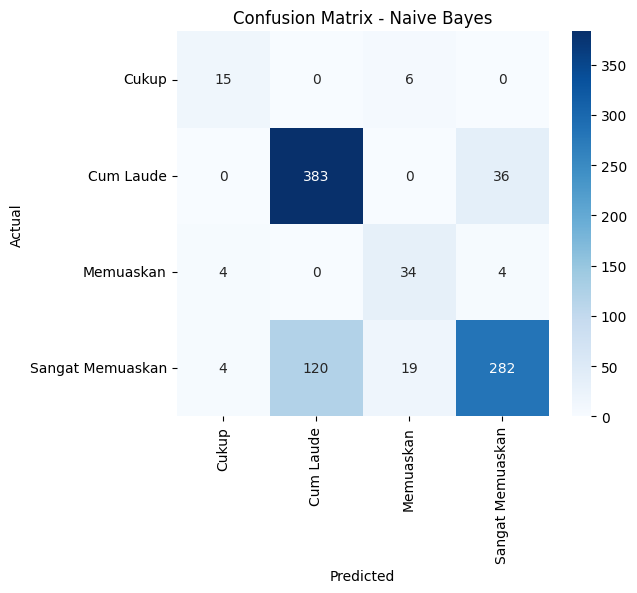

In [ ]:
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y))
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {title}')
    plt.show()

# Visualisasi
plot_conf_matrix(y_test, y_pred_lr, "Logistic Regression")
plot_conf_matrix(y_test, y_pred_nb, "Naive Bayes")

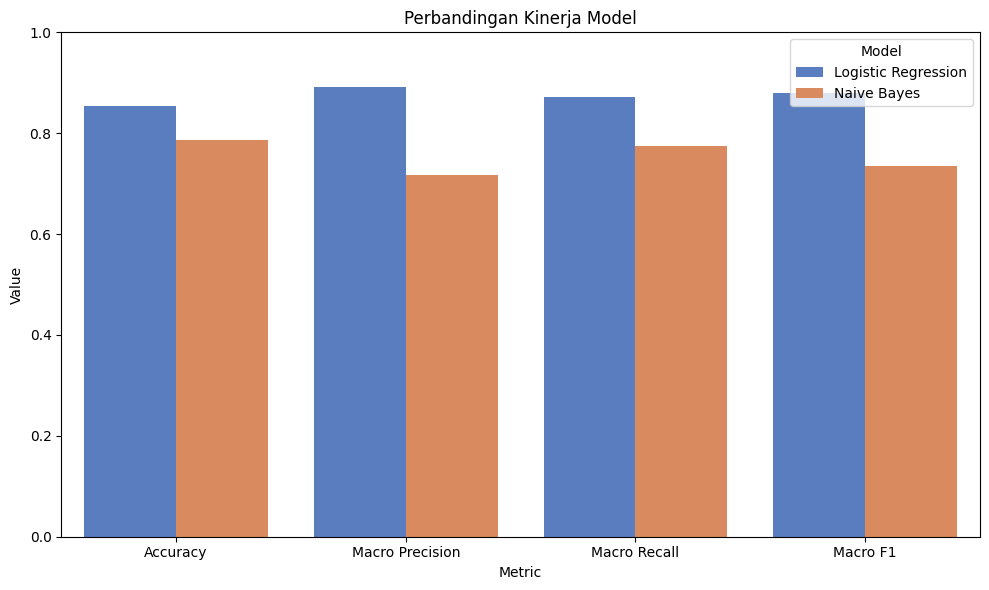

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Menyimpan skor
scores = {
    'Model': ['Logistic Regression', 'Naive Bayes'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_nb)
    ],
    'Macro Precision': [
        precision_score(y_test, y_pred_lr, average='macro'),
        precision_score(y_test, y_pred_nb, average='macro')
    ],
    'Macro Recall': [
        recall_score(y_test, y_pred_lr, average='macro'),
        recall_score(y_test, y_pred_nb, average='macro')
    ],
    'Macro F1': [
        f1_score(y_test, y_pred_lr, average='macro'),
        f1_score(y_test, y_pred_nb, average='macro')
    ]
}

df_scores = pd.DataFrame(scores).melt(id_vars='Model', var_name='Metric', value_name='Value')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Model', data=df_scores, palette='muted')
plt.title('Perbandingan Kinerja Model')
plt.ylim(0, 1)
plt.legend(title='Model')
plt.tight_layout()
plt.show()